<a href="https://colab.research.google.com/github/korayercan/EnergyEfficiency/blob/main/EnergyEfficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> https://www.kaggle.com/datasets/elikplim/eergy-efficiency-dataset/data



In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


X1 Relative Compactness

X2 Surface Area

X3 Wall Area

X4 Roof Area

X5 Overall Height

X6 Orientation

X7 Glazing Area

X8 Glazing Area Distribution

y1 Heating Load -> dependent1

y2 Cooling Load -> dependent2


In [69]:
col_names = ['compactness', 'surface_area', 'wall_area', 'roof_area', 'height', 'orientation', 'glazing_area', 'distribution', 'heating_load', 'cooling_load']
df.columns = col_names
df.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   compactness   768 non-null    float64
 1   surface_area  768 non-null    float64
 2   wall_area     768 non-null    float64
 3   roof_area     768 non-null    float64
 4   height        768 non-null    float64
 5   orientation   768 non-null    int64  
 6   glazing_area  768 non-null    float64
 7   distribution  768 non-null    int64  
 8   heating_load  768 non-null    float64
 9   cooling_load  768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


<Figure size 1500x1000 with 0 Axes>

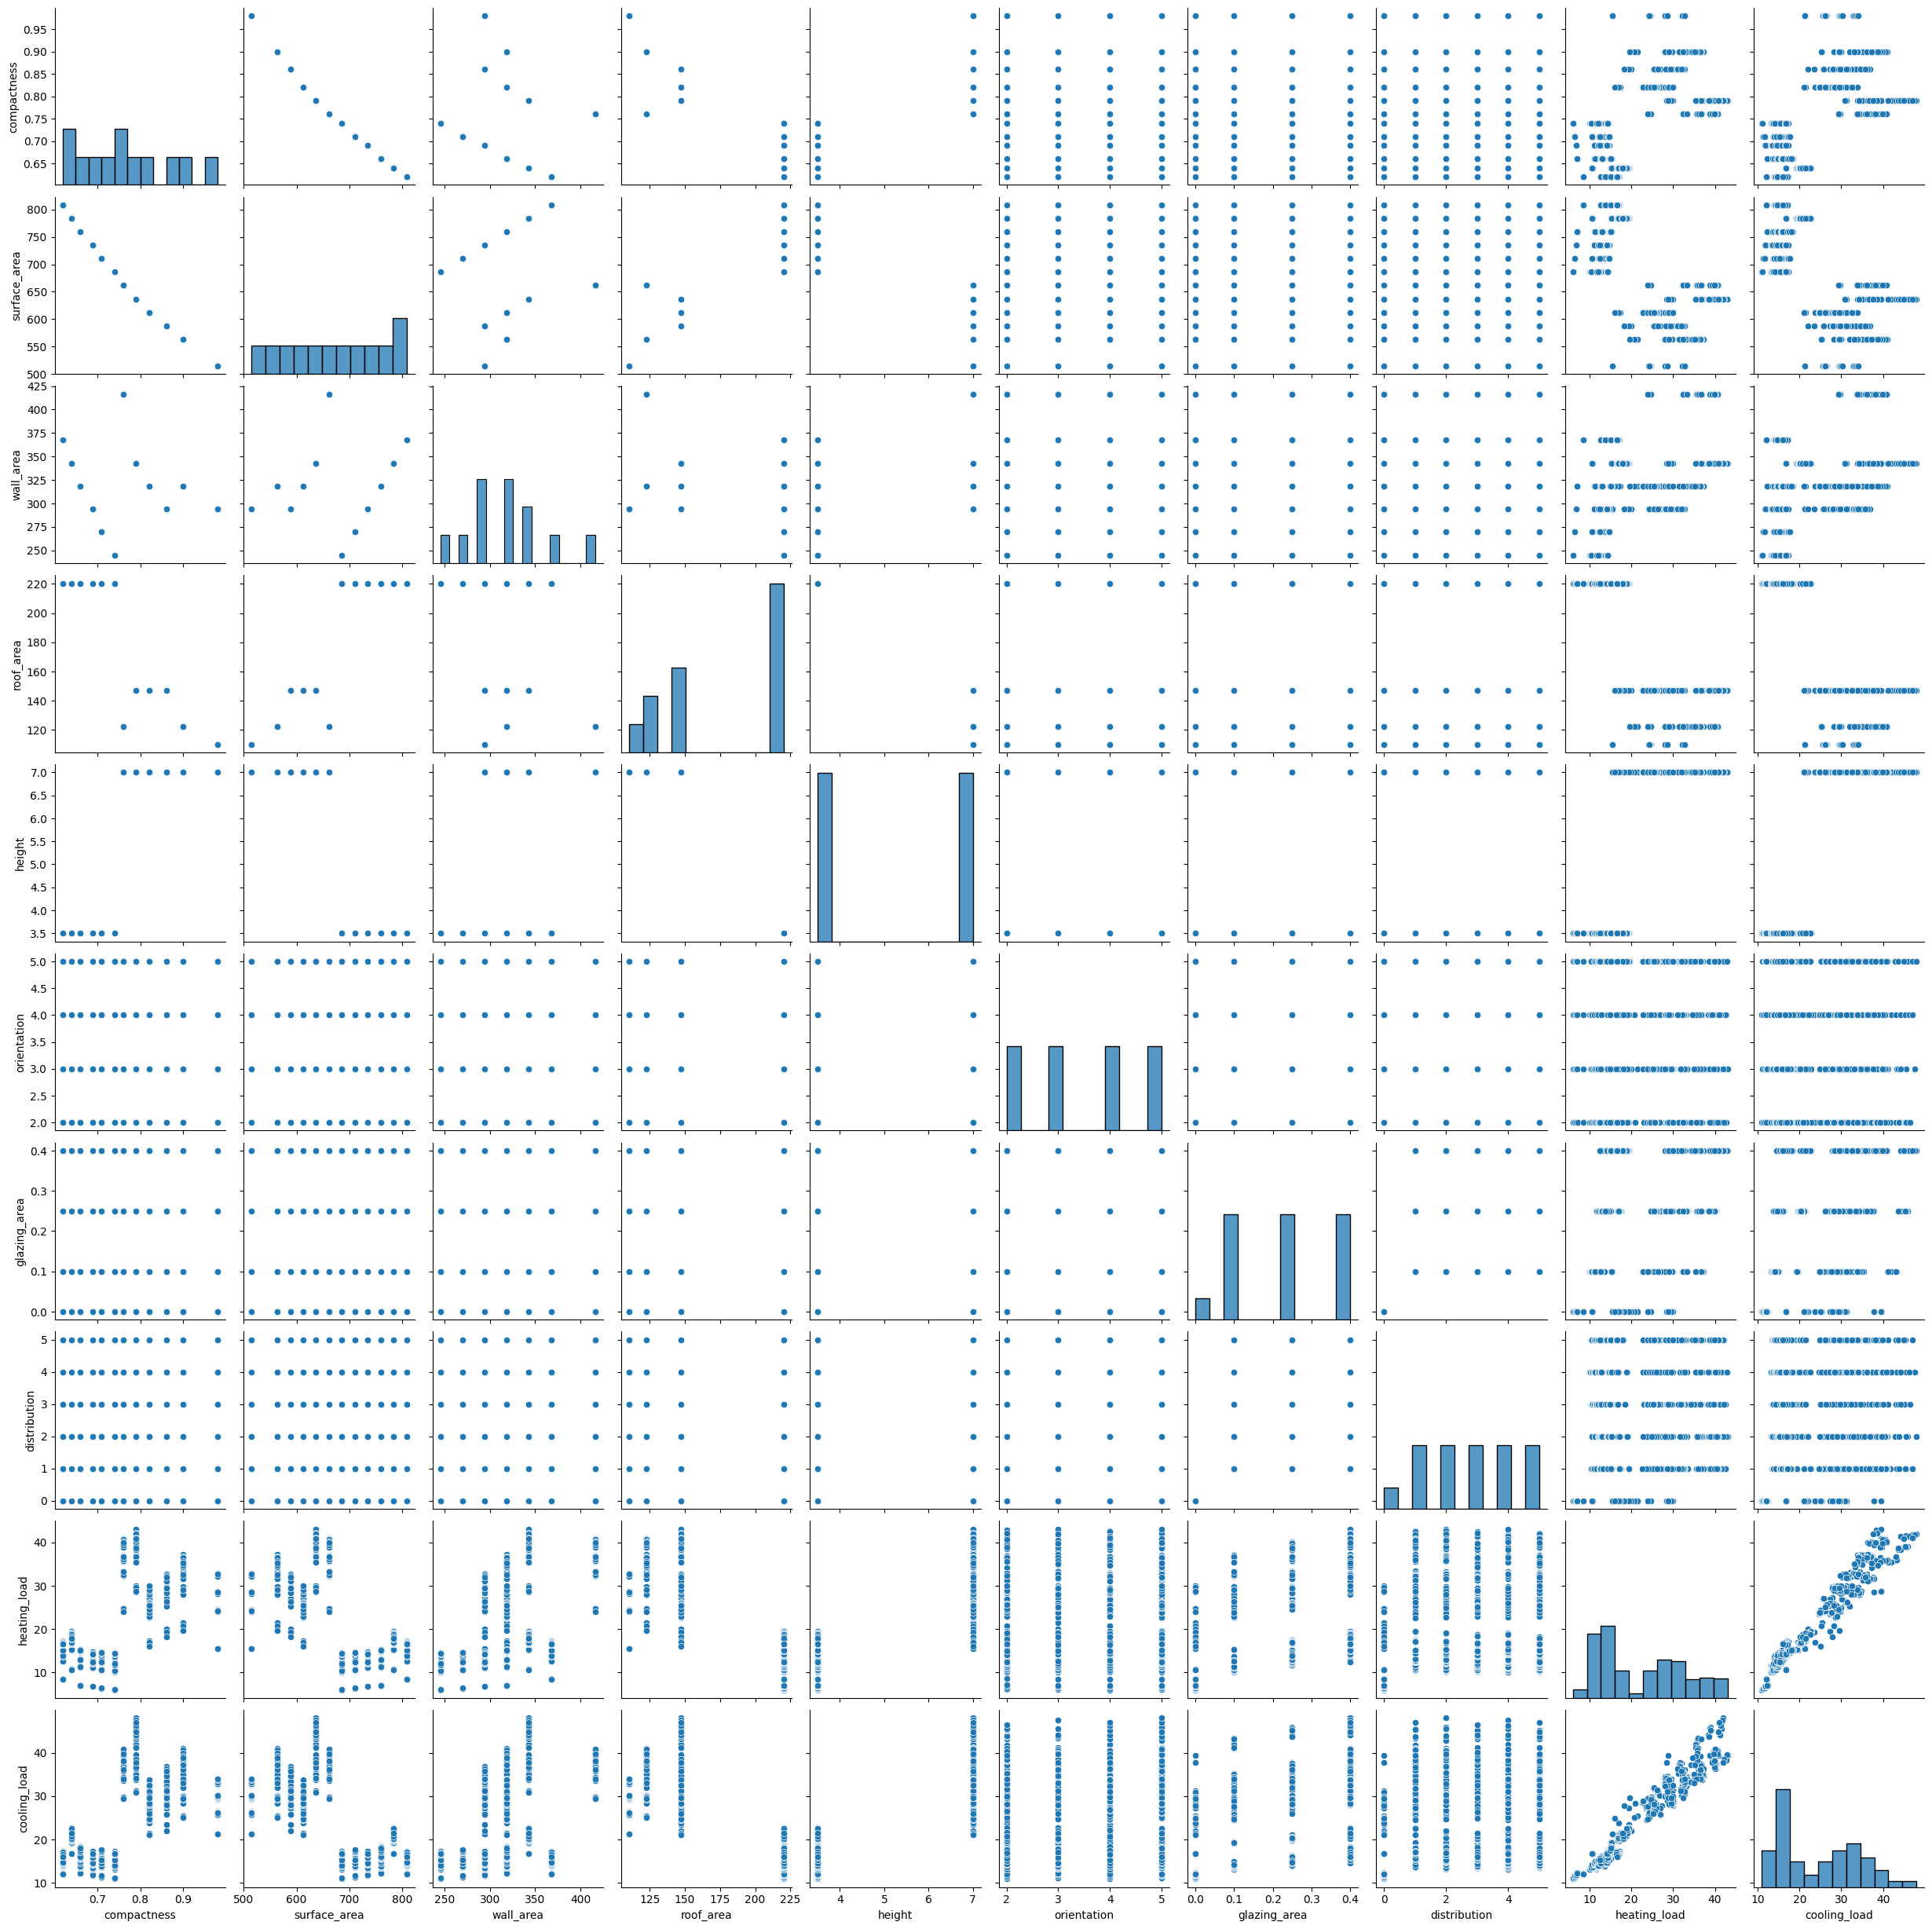

In [71]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()


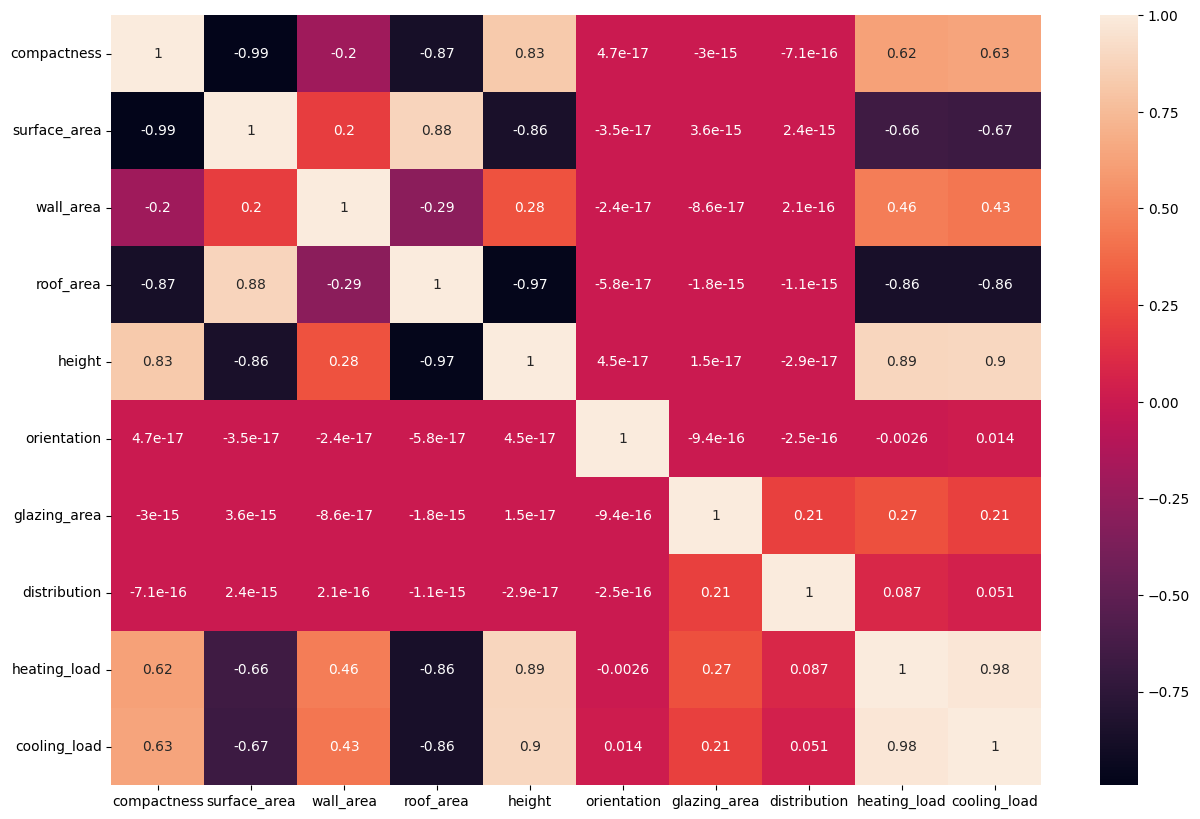

In [72]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [73]:
df['orientation'].unique()

array([2, 3, 4, 5])

In [74]:
df['distribution'].unique()

array([0, 1, 2, 3, 4, 5])

In [75]:
X = df.drop(['heating_load', 'cooling_load'], axis=1)
y_heating = df['heating_load']
y_cooling = df['cooling_load']

In [76]:
X_train, X_test, y_train_heating, y_test_heating, y_train_cooling, y_test_cooling = train_test_split(X, y_heating, y_cooling, test_size=0.2, random_state=15)

In [77]:
num_cols = ['compactness', 'surface_area', 'wall_area', 'roof_area', 'height', 'orientation', 'glazing_area', 'distribution']
cat_cols = ['orientation', 'distribution']

In [78]:
from sklearn.preprocessing import OneHotEncoder
pre = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [79]:
param_tree = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter" : ["best", "random"],
    "max_features" : ["sqrt", "log2", None]
    }

param_svr = {
    "kernel" : ["linear", "poly", "rbf", "sigmoid"],
    "degree" : [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "gamma" : ["scale", "auto"],
    }

In [83]:
models = {
    'LinearRegression': LinearRegression(),
    'RidgeCV': RidgeCV(),
    'LassoCV': LassoCV(),
    'ElasticNetCV': ElasticNetCV(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'DecisionTreeRegressor_param': GridSearchCV(DecisionTreeRegressor(), param_grid=param_tree),
    # 'SVR': SVR(),
    # 'SVR_param': GridSearchCV(SVR(), param_grid=param_svr)
}

In [84]:
results_heating = {}
results_cooling = {}

In [87]:
for name, model in models.items():
  pipe = Pipeline([
      ('pre', pre),
      ('model', model)
  ])
  pipe.fit(X_train, y_train_heating)
  y_pred_heating = pipe.predict(X_test)
  mse = mean_squared_error(y_test_heating, y_pred_heating)
  r2 = r2_score(y_test_heating, y_pred_heating)
  mae = mean_absolute_error(y_test_heating, y_pred_heating)
  results_heating[name] = [mse, r2, mae]

for name, model in models.items():
  pipe = Pipeline([
      ('pre', pre),
      ('model', model)
  ])
  pipe.fit(X_train, y_train_cooling)
  y_pred_cooling = pipe.predict(X_test)
  mse = mean_squared_error(y_test_cooling, y_pred_cooling)
  r2 = r2_score(y_test_cooling, y_pred_cooling)
  mae = mean_absolute_error(y_test_cooling, y_pred_cooling)
  results_cooling[name] = [mse, r2, mae]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.176e+01, tolerance: 5.366e+00
  model = cd_fast.enet_coordinate_descent(


In [88]:
#showing results
df_results_heating = pd.DataFrame(results_heating, index=['MSE', 'R2', 'MAE'])
df_results_cooling = pd.DataFrame(results_cooling, index=['MSE', 'R2', 'MAE'])

In [89]:
df_results_heating

,LinearRegression,RidgeCV,LassoCV,ElasticNetCV,DecisionTreeRegressor,DecisionTreeRegressor_param
MSE,8.981861,8.982071,9.028266,9.234102,0.402093,0.383987
R2,0.917451,0.917449,0.917025,0.915133,0.996305,0.996471
MAE,2.156332,2.156027,2.168625,2.181834,0.417857,0.416104


In [90]:
df_results_cooling

,LinearRegression,RidgeCV,LassoCV,ElasticNetCV,DecisionTreeRegressor,DecisionTreeRegressor_param
MSE,12.453431,12.455186,12.503267,12.865890,7.670202,6.159216
R2,0.876709,0.876692,0.876216,0.872626,0.924064,0.939023
MAE,2.440031,2.440344,2.442070,2.485244,1.618766,1.435519
